In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndex2
import ndex2.client
from ndex2 import cx2
import cdapsutil
import numpy as np

In [32]:
file='/Users/fh/Documents/project/python code/BNFO 286/repl1_repl2_combined.tsv'
table=pd.read_table(file, index_col=0)

In [33]:
from scipy.stats import zscore

In [34]:
nan_to_0_table=table.fillna(0)

In [35]:
#z_score separetly
replicate1=nan_to_0_table.iloc[:, :72]

In [36]:
replicate2=nan_to_0_table.iloc[:, 72:]

In [37]:
zscore_normalized_rep1 = replicate1.apply(zscore, axis=1)

In [38]:
zscore_normalized_rep2 = replicate2.apply(zscore, axis=1)
#pearson correlation:
correlation1 = zscore_normalized_rep1.T.corr(method='pearson')  #runs quite fast
np.fill_diagonal(correlation1.values, 0)
correlation2 = zscore_normalized_rep2.T.corr(method='pearson')  #runs quite fast
np.fill_diagonal(correlation2.values, 0)

In [39]:
## another threshold
thresold = 0.9
subset_correlation1 = correlation1.applymap(lambda x: x if x > thresold else 0)

G1 = nx.from_pandas_adjacency(subset_correlation1)


/var/folders/tx/0n5tk8l91vx8wm09zl728zsr0000gn/T/ipykernel_39346/2975609114.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset_correlation1 = correlation1.applymap(lambda x: x if x > thresold else 0)


In [40]:
subset_correlation2 = correlation2.applymap(lambda x: x if x > thresold else 0)

G2 = nx.from_pandas_adjacency(subset_correlation2)


/var/folders/tx/0n5tk8l91vx8wm09zl728zsr0000gn/T/ipykernel_39346/993527903.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset_correlation2 = correlation2.applymap(lambda x: x if x > thresold else 0)


In [42]:
combined_G = intersect_networks(G1, G2, weight_mode='average', fixed_value=1)


Edges in resulting network: 185402
Edges removed from G1: 373123
Edges removed from G2: 237504


In [43]:
#conert nx to nicex
###  first convert to ndex

G_ndex = ndex2.create_nice_cx_from_networkx(combined_G)

In [44]:
# Create CommunityDetection object
#thi is the step that can take a bit - but not too bad
cd = cdapsutil.CommunityDetection()
G_hier = cd.run_community_detection(G_ndex, algorithm='hidefv1.1beta',arguments={'--maxres':'300'}) #play around with max res param or other params here


In [85]:
#back to networkx
G_hier_net = G_hier.to_networkx(mode='default')


In [86]:

#find which proteins are in which 'node' / community
hier_df1000 = pd.DataFrame.from_dict(dict(G_hier_net.nodes(data=True)), orient='index')
hier_df1000['system_ID'] = hier_df1000.index.tolist()
hier_df1000['CD_MemberList_Size'] = [int(x) for x in hier_df1000['CD_MemberList_Size'].tolist()]
hier_df1000['HiDeF_persistence'] = [int(x) for x in hier_df1000['HiDeF_persistence'].tolist()]
#hier_df.head()


In [90]:
hier_df1000

,CD_MemberList,CD_MemberList_Size,CD_Labeled,CD_MemberList_LogSize,CD_CommunityName,CD_AnnotatedMembers,CD_AnnotatedMembers_Size,CD_AnnotatedMembers_Overlap,CD_AnnotatedMembers_Pvalue,HiDeF_persistence,represents,name,system_ID
0,5LZQFXUR7 S4TCZVULH ITRXH9D2J 539184C62 AUOHU3...,4108,False,12.004,,,0,0.0,0.0,0,C8175,C8175,0
1,XSRCKQMR7 8K2V0GDU1 A53QVGEGN 54XIYOOC8 9SYS56...,6,False,2.585,,,0,0.0,0.0,8,C8576,C8576,1
2,6SQ9KKB2T 824RHU94S EMSKUVDT7 UITIHQ961 U5T1XZ...,27,False,4.755,,,0,0.0,0.0,355,C8290,C8290,2
3,IS2TPM28J XL18PMO40 KUL5GUP4K EJC4B74E4 0H5QSE...,27,False,4.755,,,0,0.0,0.0,9,C8295,C8295,3
4,SRJ1SNY64 A3TVKTAS8 2NPQI14KI 4WEVGMEA5 PQO8SE...,8,False,3.0,,,0,0.0,0.0,379,C8456,C8456,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PHCG2FXQG FQF7BNRG9 9SPC8J5B4 T3Y3YQ9PK,4,False,2.0,,,0,0.0,0.0,46,C8695,C8695,715
716,5O58BB1M7 7LFM80RA4 BKHMOXTLA VE426L0I4,4,False,2.0,,,0,0.0,0.0,7,C8846,C8846,716
717,EPMD3KJOR 3W7WM2IYE 5AE88YLVM 33SLSA4XA,4,False,2.0,,,0,0.0,0.0,38,C8742,C8742,717
718,B7HP8550Q 4U99167PS 8PA2ABTRE ED0D3OQJQ,4,False,2.0,,,0,0.0,0.0,24,C8721,C8721,718


(array([708.,   6.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([4.0000e+00, 4.1440e+02, 8.2480e+02, 1.2352e+03, 1.6456e+03,
        2.0560e+03, 2.4664e+03, 2.8768e+03, 3.2872e+03, 3.6976e+03,
        4.1080e+03]),
 <BarContainer object of 10 artists>)

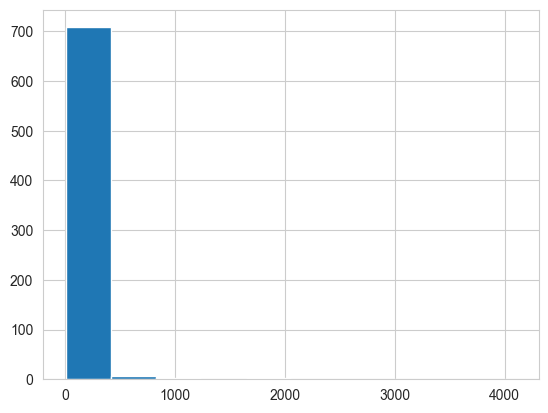

In [87]:
plt.hist(hier_df1000['CD_MemberList_Size'])


In [88]:
trimmed = []
for i in hier_df1000['CD_MemberList_Size']:
    if i < 40:
        trimmed.append(i)
min(trimmed)


4

628

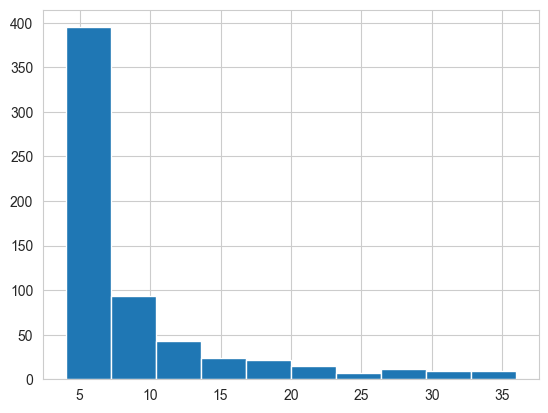

In [95]:
plt.hist(trimmed)
len(trimmed)

In [107]:
onecluster = pd.read_csv("/onecluster coelution.csv", index_col=0)
onecluster
keep_list = list(onecluster["xxx"])
keep_list

['R49EOALLZ',
 'KUL5GUP4K',
 'WMKA01KZL',
 'M63BPTX3O',
 '2ITFS2CSX',
 'WZWDJOYWP',
 'VQHYOIJXB',
 '4TCKKFPDC',
 'VRMBFPXU1',
 '6F4XDSLVC',
 'PEEH3WXNL',
 'FVLAISWKQ',
 'CMTLLG7EM',
 'M51ZY1V3X',
 'GPE9DP0VI',
 '3TZ705W3C',
 '4QMKXZGJ4',
 'DMGHRVLKS',
 '9H1YTBNX5',
 'SWTLMUK90',
 'FO6CNFYRA',
 'QK7IAE1CS',
 'ZNJP4U625',
 'FNMC0MVYG',
 'XJMVX555U',
 'NWZWEA5SQ',
 'NRGFGYQEG',
 'HD9DJ3U5Y',
 'FADQAB51D',
 'SMP6BHOTH',
 'XV6B6P0MI',
 'SGN6OS97M',
 '6UXJC0443',
 'R086L2ZB4',
 'PLL0LEWKE',
 'UD2WEXWWG',
 'M5LM8GKN1',
 '9K2ZFSQOJ',
 'IOVFNXNFW',
 '2TTG8SDRB',
 'XLXPPLHOH',
 'F5G6YLO2A',
 'R80CHIQOB',
 'UK7H0EHV5',
 '8M3AR8QWU',
 'CPFG4UMRT',
 'FFMF3KHG9',
 '1492JGBAL',
 'POJXYTWIX',
 'NBK8O3VZ7',
 'JHK7A2OA1',
 'FQF7BNRG9',
 'AAAWX170V',
 'BRFFMYP4R',
 '21N0XSGVZ',
 '3K9NV78OJ',
 'G74J9WTRV',
 'W4AJ0YX1Y',
 'K0S4W56ME',
 'EQWTT342X',
 '0NDVS7L41',
 'FLIHX7P9L',
 '71O9TKF4D',
 '7RO792SRG',
 'TYY8OKWY6',
 'T0ADZ9JRC',
 'DF5FRNIM6',
 '7L2E0IB4Q',
 'TBR391NH6',
 'LX2F1GAWC',
 'AA8BUULLY',
 '9DDM

In [108]:
filtered_communiities = []
for st in hier_df1000['CD_MemberList']:
    
    i=st.split()
    new_i=[]
    for nod in i:
        if nod in keep_list:
            new_i.append(nod)
    if len(new_i) >0:        
        filtered_communiities.append(new_i)


In [109]:
len(filtered_communiities)

646

(array([631.,   8.,   3.,   2.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.4230e+02, 2.8360e+02, 4.2490e+02, 5.6620e+02,
        7.0750e+02, 8.4880e+02, 9.9010e+02, 1.1314e+03, 1.2727e+03,
        1.4140e+03]),
 <BarContainer object of 10 artists>)

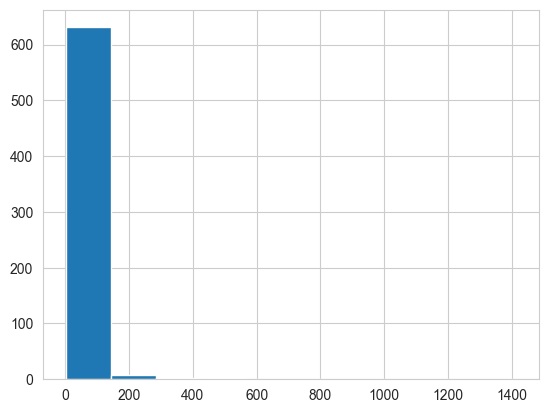

In [110]:
com_size = []
ones = 0
for community in filtered_communiities:
    com_size.append(len(community))
    if len(community) == 1:
        ones += 1

plt.hist(com_size)

In [111]:
trimmed_filtered_communiities = []
for i in filtered_communiities:
    #print("comm: " ,i)
    if len(i) < 40:
        #print("len comm: :", len(i))
        trimmed_filtered_communiities.append(i)


comm:  ['5LZQFXUR7', 'I65Y1ZI7V', 'QDTFGBQMQ', 'G9UXAPBJX', 'BQY776TBI', 'XGUW262YR', 'TJIKOOWC6', 'VWE2N62IA', 'L9NC6QY6R', 'F23GUO6GP', 'RP3KLLZFZ', 'SIH5SSAZL', 'TMEXH3TER', '0AAMUVG2Z', '9FD9X6RQK', '5342KVQSX', 'T3Y3YQ9PK', 'DV7HSOAZE', 'EFA2HXSDR', 'X0AVGIOBK', 'O01DIQXRO', '1E9YXJ3CB', '8JD7SVTV9', 'HWDDJLFSU', 'DXH4MQTUP', 'VZQAFUMUS', 'B2K1AYXH5', 'P5D76V14G', 'U35AW46HW', 'QFJIAKE5H', 'G1DNDA6E8', 'WUSZKIGD9', 'X42A8BJ55', 'OM4Z93HU7', 'A2J14ZVOJ', 'F807XHRXR', '1YX0SEIAA', 'RO273X460', 'N7N8PYT1E', 'CXDCBWJCO', '84JDF9FRM', '0XL3XJX1I', 'A7QXC9LSZ', '3QU1VDBDT', '7Y8LN36EV', 'HBXIM30XY', 'VFYZX81AZ', '4NSA7CL8B', 'NG7K8O645', 'R173W8G1D', '06Z0VO4C6', 'XLXPPLHOH', 'VV0XY3OTJ', 'F9MFM4AZQ', 'KPCV50SU3', 'A4IDRLWGV', 'AQ8UN8END', 'FN2R9IZZH', 'R086L2ZB4', 'NJJBRM2T3', 'DYFHEH3TU', 'DUJHKZ6K8', 'R4XBC6L3J', '3Q3UDHV8Q', 'AK4YD1YX7', '3LIEAXBXP', 'PJZEJESR2', 'ODJQHTT7Q', 'SWWT411PJ', 'MD7WNVU1J', '93KXR339K', 'XV6B6P0MI', 'ROMLZUMSQ', '7NP531ILM', 'L42U6SUEE', 'B1GC4YDZE', 'A6F

1

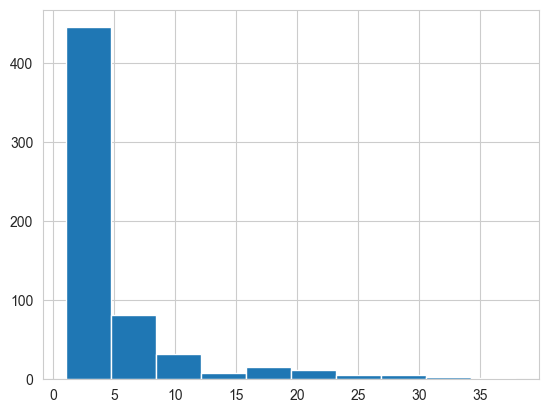

In [113]:
com_size = []
ones = 0
for community in trimmed_filtered_communiities:
    com_size.append(len(community))
    if len(community) == 1:
        ones += 1

plt.hist(com_size)
min(com_size)

In [101]:

trimmed_communiities = []
for st in hier_df1000['CD_MemberList']:
    
    i=st.split()
    print("comm: " ,i)
    if len(i) < 40:
        print("len comm: :", len(i))
        trimmed_communiities.append(i)


comm:  ['5LZQFXUR7', 'S4TCZVULH', 'ITRXH9D2J', '539184C62', 'AUOHU3D6Z', 'OLA99SUOZ', 'RRJED6FCN', 'PUF8NGP58', 'XBFQI5FVA', 'Z3GBWJ87D', 'I65Y1ZI7V', 'QDTFGBQMQ', 'KTED7WTO7', 'G89AZJUQY', 'G9UXAPBJX', 'BQY776TBI', 'XGUW262YR', 'ZTMWIWVEN', 'TJIKOOWC6', 'VWE2N62IA', 'L9NC6QY6R', 'TXRN6U9ES', 'T76FXRXQ5', '69KVOLBQ1', 'X23EK0J27', '4ERAE41I6', 'F23GUO6GP', 'RP3KLLZFZ', 'PJKJWJCRF', 'SIH5SSAZL', 'TMEXH3TER', '0AAMUVG2Z', '430AJKMMC', 'PL87SLU32', '9FD9X6RQK', 'P08EJVBV4', '1SXIHYTF1', '2W0EE97X5', '5342KVQSX', 'G1CXTWB7Y', '1XXS0IZE7', '9C1MGWWYO', 'T3Y3YQ9PK', 'DRZL13VGM', 'DV7HSOAZE', 'EFA2HXSDR', 'MUPLHUL3B', 'INMRYCKA7', 'WKR52589I', 'D0MKTK7UI', 'X0AVGIOBK', 'E5ELKZ0WE', 'KH7CVI6Q6', 'M1DQLL3RS', 'O01DIQXRO', 'HS2UD06JS', 'XCEYU93M4', 'BFUVFWB3M', '1E9YXJ3CB', '8JD7SVTV9', 'ROWHI8TPN', 'HWDDJLFSU', 'HZOW4GQCU', 'K35W662TD', 'LU36HFG4Q', '3X1NWTXA7', 'SLCEOSWWP', 'XX8YWDAN1', 'DXH4MQTUP', 'TPB6YRAM5', 'OLLD9ALWW', 'VZQAFUMUS', 'C2UE1YHFI', 'W1OSL84JU', 'B2K1AYXH5', 'Z2EN1B2SW', 'P5D

In [123]:
len(trimmed_communiities)


628

In [103]:
trimmed_communiities

[['XSRCKQMR7',
  '8K2V0GDU1',
  'A53QVGEGN',
  '54XIYOOC8',
  '9SYS56QXH',
  '5XF7L32NQ'],
 ['6SQ9KKB2T',
  '824RHU94S',
  'EMSKUVDT7',
  'UITIHQ961',
  'U5T1XZ3AF',
  'KDE3L8UDG',
  'FV3TUB4V1',
  '3NQUP35B2',
  'CLQXA5Q9N',
  'JUH2F35X7',
  'HRAXOZYYG',
  'VOZRI36M9',
  '1YYKY665Y',
  'E6UA7JFC9',
  'SHTJ4VU11',
  'FGX0LLUAL',
  '0ER1U41VH',
  'WYUCCOJ1G',
  'D28HWOQ1W',
  'Z7OIEE9DO',
  '8JD7SVTV9',
  'YXJ6AW8SO',
  'DY6J5S6XF',
  'DH0VBX7PO',
  '48ERDYJTY',
  '4XOQTUWJW',
  'PTYHZII2M'],
 ['IS2TPM28J',
  'XL18PMO40',
  'KUL5GUP4K',
  'EJC4B74E4',
  '0H5QSEHX7',
  '5EBG335XA',
  '13PRCH0XQ',
  'XJMVX555U',
  'W9FWHSLWO',
  'Q85ZSAQUC',
  'UYRI16UCE',
  'ISRPYEAHG',
  '4QIJY8E5U',
  'DUNIY1ZE7',
  'G68Q95T1B',
  '97D4L5QK8',
  'VNGXLI81J',
  'VMFWXDY6Q',
  'XSAUN3LBO',
  '04AO5B0HC',
  'IUTVWL0KO',
  '2CV2DMR5O',
  'WMAMMTZGY',
  '8EY3BFQLR',
  'SI7TZWDN6',
  '5BDBUB09X',
  'K1IKDVTZ9'],
 ['SRJ1SNY64',
  'A3TVKTAS8',
  '2NPQI14KI',
  '4WEVGMEA5',
  'PQO8SE627',
  '09U5W8BJA',
  '1IOC

In [104]:
label_list = []
nodes_list = []
label = 1
for community in trimmed_communiities:
    for nod in community:
        label_list.append("community " + str(label))
        nodes_list.append(nod)
        #combined_G.nodes[nod]["community label"]="community "+str(label)
    label += 1


In [105]:

output_coe12 = pd.DataFrame({"id": range(len(nodes_list)),
                             "xxx": nodes_list,
                             "prediction": label_list})


In [106]:
output_coe12

,id,xxx,prediction
0,0,XSRCKQMR7,community 1
1,1,8K2V0GDU1,community 1
2,2,A53QVGEGN,community 1
3,3,54XIYOOC8,community 1
4,4,9SYS56QXH,community 1
...,...,...,...
5377,5377,ED0D3OQJQ,community 627
5378,5378,IHS0G9K0F,community 628
5379,5379,GIKMYKHK2,community 628
5380,5380,5BCQ4PSYA,community 628


In [122]:

output_coe12.to_csv("output_coe 12.csv", index=False)

In [141]:
#overlap_with_keep list
overlap_with_keep_list = []
for prn in keep_list:
    if prn in list(output_coe12["xxx"]):
        overlap_with_keep_list.append(prn)
len(overlap_with_keep_list)


869

In [41]:
def intersect_networks(G1, G2, weight_mode='fixed', fixed_value=1):
    #receives two networks with the same node names, and returns a third network that only keeps the edges that are present in both
    #option to set all output node weights to either a fixed provided value, or use the average, maximum or, minimum of the overlapping edges in the two input networks
    G_common = nx.Graph()
    G_common.add_nodes_from(G1.nodes)
    
    edges_G1 = set(G1.edges())
    edges_G2 = set(G2.edges())
    common_edges = edges_G1 & edges_G2
    
    for u, v in common_edges:
        w1 = G1[u][v].get('weight', 1)
        w2 = G2[u][v].get('weight', 1)
        
        if weight_mode == 'average':
            weight = (w1 + w2) / 2
        elif weight_mode == 'max':
            weight = max(w1, w2)
        elif weight_mode == 'min':
            weight = min(w1, w2)
        else:  # 'fixed'
            weight = fixed_value
        
        G_common.add_edge(u, v, weight=weight)
    
    print(f"Edges in resulting network: {len(G_common.edges())}")
    print(f"Edges removed from G1: {len(edges_G1 - common_edges)}")
    print(f"Edges removed from G2: {len(edges_G2 - common_edges)}")
    
    return G_common